# Machine Learning on PGA Tour - Classification Methods

In [1]:
# Imports
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix, precision_score
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv("../data/pga_data.csv")
df

,Name,Season,Ranking,Driving Distance,Driving Accuracy,Club Head Speed,Ball Speed,Spin Rate,Eligible
0,Rory McIlroy,2016,1,304.9,61.80,119.62,179.01,2435.6,1.0
1,Dustin Johnson,2016,2,313.9,56.85,122.38,181.75,2685.6,1.0
2,Patrick Reed,2016,3,296.7,56.68,118.37,172.95,2936.1,1.0
3,Adam Scott,2016,4,303.9,55.71,119.05,179.21,2507.4,1.0
4,Paul Casey,2016,5,294.0,64.41,117.46,173.41,2473.3,1.0
...,...,...,...,...,...,...,...,...,...
734,C.T. Pan,2021,121,296.3,61.03,111.20,167.34,2129.2,-1.0
735,Matt Kuchar,2021,122,288.0,65.81,108.60,162.18,2419.4,-1.0
736,Brice Garnett,2021,123,288.1,70.86,109.53,164.71,2539.5,-1.0
737,Scott Stallings,2021,124,298.2,58.83,115.96,173.80,2516.0,-1.0


Support Vector Machine

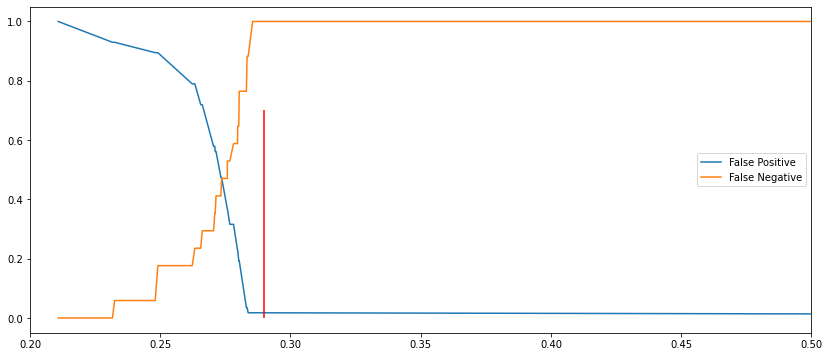

In [3]:
X = df.iloc[:, 3:8].to_numpy()
y = df.iloc[:, 8].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=12)
clf = svm.SVC(probability=True, random_state=12)
clf.fit(X_train, y_train)

# PLOTTING FALSE POSITIVES AND TRUE POSITIVES
plt.figure(figsize=(14, 6))

pos_predictions = clf.predict_proba(X_test)[:, 1]
false_positives, true_positives, thresholds = metrics.roc_curve(y_test, pos_predictions)
plt.plot(thresholds, false_positives, label="False Positive")
plt.plot(thresholds, 1 - true_positives, label="False Negative")
plt.vlines(x=0.29, ymin=0, ymax=0.7, color="red")
plt.xlim((0.2, 0.5))
plt.legend();

In [4]:
y_pred = np.where(pos_predictions > 0.29, 1, -1)
confusion_matrix(y_test, y_pred)

array([[57,  0],
       [17,  0]])

In [5]:
f1_score(y_test, y_pred)

0.0

In [6]:
accuracy_score(y_test, y_pred)

0.7702702702702703

In [7]:
recall_score(y_test, y_pred)

0.0

In [9]:
precision_score(y_test, y_pred)

/home/leinoj/anaconda3/envs/pga-tour-ml/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

Logistic Regression

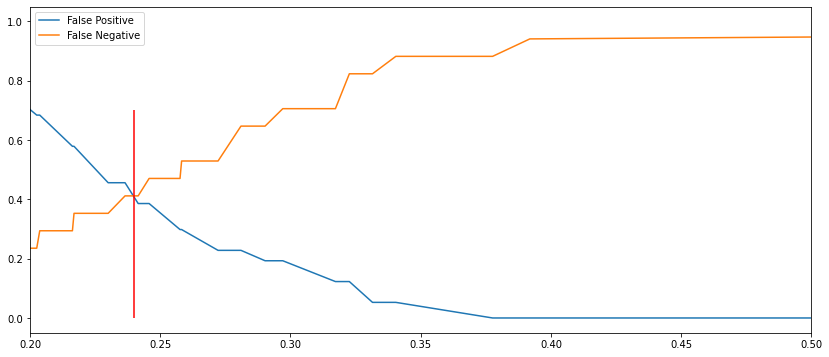

In [11]:
X = df.iloc[:, 3:8].to_numpy()
y = df.iloc[:, 8].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=12)
lr = LogisticRegression(random_state=12)
lr.fit(X_train, y_train)

# PLOTTING FALSE POSITIVES AND TRUE POSITIVES
plt.figure(figsize=(14, 6))

pos_predictions = lr.predict_proba(X_test)[:, 1]
false_positives, true_positives, thresholds = metrics.roc_curve(y_test, pos_predictions)
plt.plot(thresholds, false_positives, label="False Positive")
plt.plot(thresholds, 1 - true_positives, label="False Negative")
plt.vlines(x=0.24, ymin=0, ymax=0.7, color="red")
plt.xlim((0.2, 0.5))
plt.legend();

In [12]:
y_pred = np.where(pos_predictions > 0.24, 1, -1)
confusion_matrix(y_test, y_pred)

array([[35, 22],
       [ 7, 10]])

In [13]:
f1_score(y_test, y_pred)

0.40816326530612246

In [14]:
accuracy_score(y_test, y_pred)

0.6081081081081081

In [15]:
recall_score(y_test, y_pred), precision_score(y_test, y_pred)

(0.5882352941176471, 0.3125)

Decision Tree

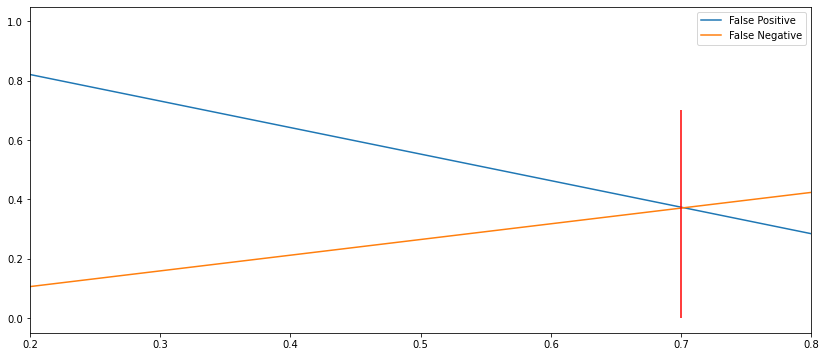

In [17]:
from sklearn.tree import DecisionTreeClassifier

X = df.iloc[:, 3:8].to_numpy()
y = df.iloc[:, 8].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=12)
dtc = DecisionTreeClassifier(random_state=12)
dtc.fit(X_train, y_train)

# PLOTTING FALSE POSITIVES AND TRUE POSITIVES
plt.figure(figsize=(14, 6))

pos_predictions = dtc.predict_proba(X_test)[:, 1]
false_positives, true_positives, thresholds = metrics.roc_curve(y_test, pos_predictions)
plt.plot(thresholds, false_positives, label="False Positive")
plt.plot(thresholds, 1 - true_positives, label="False Negative")
plt.vlines(x=0.7, ymin=0, ymax=0.7, color="red")
plt.xlim((0.2, 0.8))
plt.legend();

In [18]:
y_pred = np.where(pos_predictions > 0.7, 1, -1)
confusion_matrix(y_test, y_pred)

array([[51,  6],
       [ 9,  8]])

In [19]:
accuracy_score(y_test, y_pred)

0.7972972972972973

In [20]:
f1_score(y_test, y_pred)

0.5161290322580646

In [21]:
recall_score(y_test, y_pred), precision_score(y_test, y_pred)

(0.47058823529411764, 0.5714285714285714)